In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df = pd.read_csv('RPGF3Results.csv')

C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\3990242288.py:29: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\3990242288.py:29: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\3990242288.py:29: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPyth

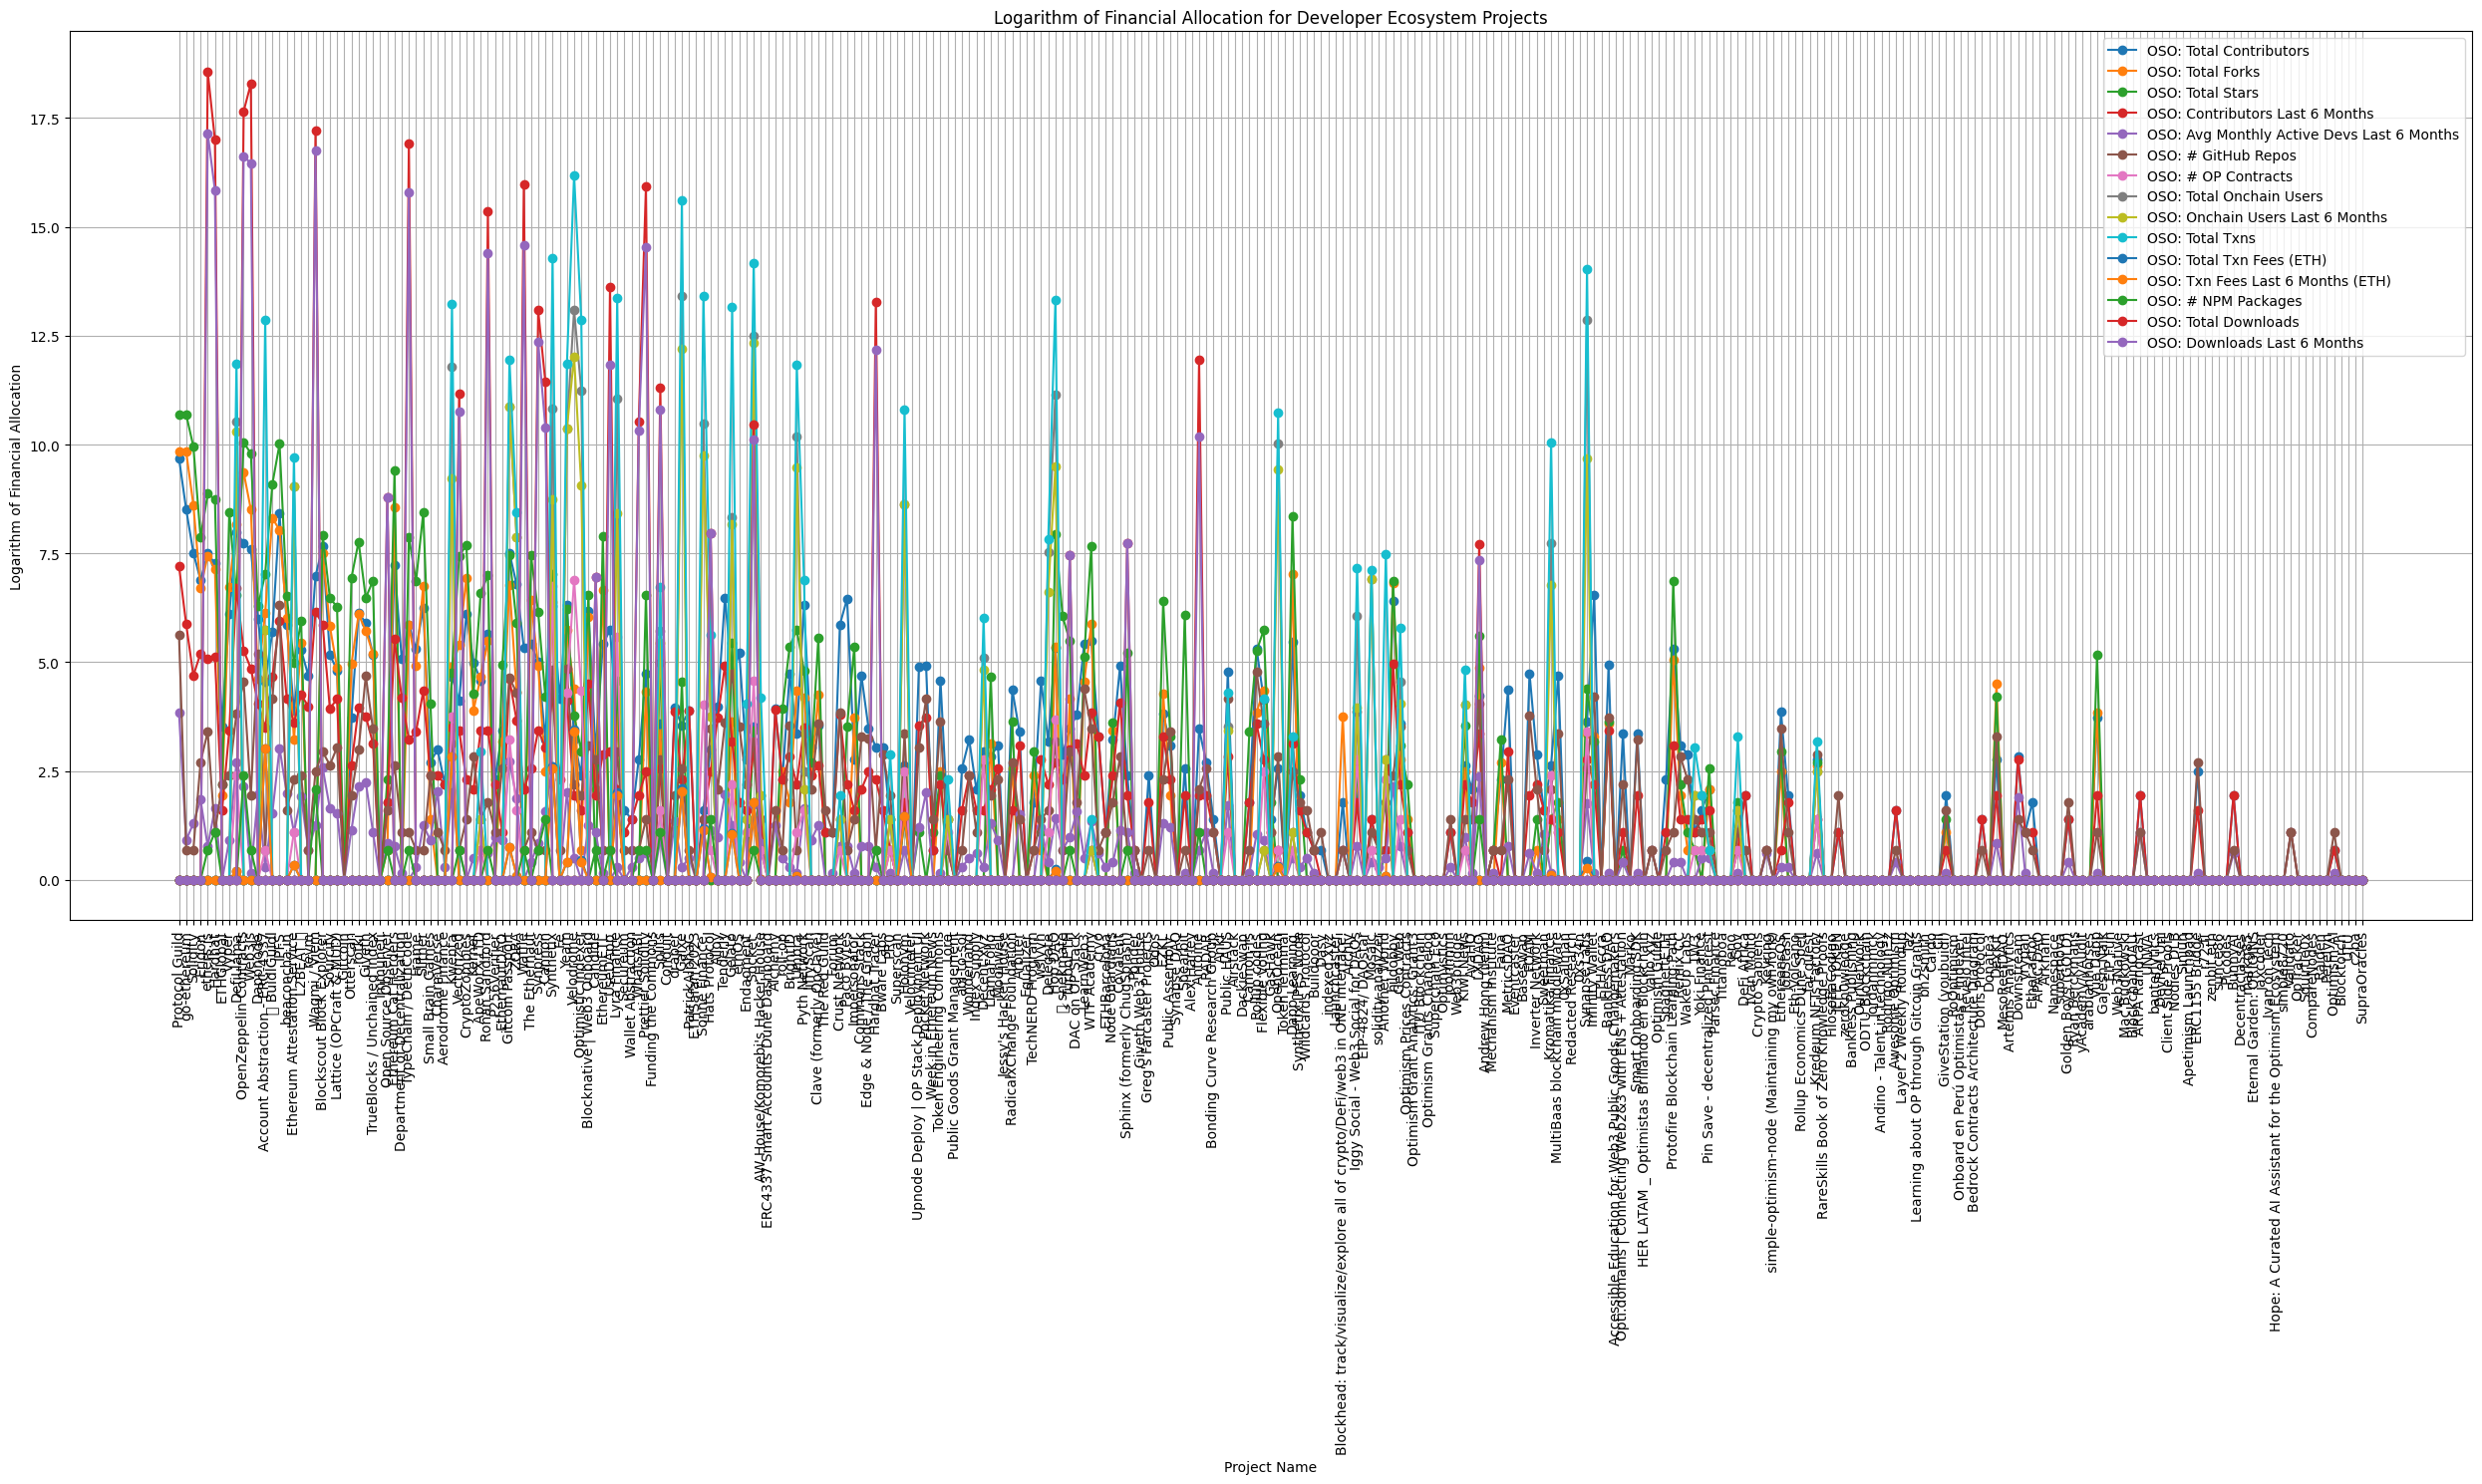

In [2]:
selected_columns = ['Meta: Project Name','Category: Developer Ecosystem','OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars',
                    'OSO: Contributors Last 6 Months', 'OSO: Avg Monthly Active Devs Last 6 Months', 'OSO: # GitHub Repos', 'OSO: # OP Contracts',
                    'OSO: Total Onchain Users', 'OSO: Onchain Users Last 6 Months', 'OSO: Total Txns', 'OSO: Total Txn Fees (ETH)',
                    'OSO: Txn Fees Last 6 Months (ETH)', 'OSO: # NPM Packages', 'OSO: Total Downloads', 'OSO: Downloads Last 6 Months']

df[selected_columns] = df[selected_columns].fillna(0)

selected_rows = df.loc[df['Category: Developer Ecosystem'] == 1, selected_columns]

columns_to_log = ['OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars', 'OSO: Contributors Last 6 Months',
                    'OSO: Avg Monthly Active Devs Last 6 Months', 'OSO: # GitHub Repos', 'OSO: # OP Contracts',
                    'OSO: Total Onchain Users', 'OSO: Onchain Users Last 6 Months', 'OSO: Total Txns', 'OSO: Total Txn Fees (ETH)',
                    'OSO: Txn Fees Last 6 Months (ETH)', 'OSO: # NPM Packages', 'OSO: Total Downloads', 'OSO: Downloads Last 6 Months']

for col in columns_to_log:
    selected_rows[col] = np.log(selected_rows[col] + 1)  # +1 หลีกเลี่ยง log(0)

plt.figure(figsize=(25, 15))

for col in columns_to_log:
    plt.plot(selected_rows['Meta: Project Name'], selected_rows[col], marker='o', label=col)

plt.title('Logarithm of Financial Allocation for Developer Ecosystem Projects')
plt.xlabel('Project Name')
plt.ylabel('Logarithm of Financial Allocation')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
selected_columns = ['Meta: Project Name','Category: Developer Ecosystem','OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars',
                    'OSO: Contributors Last 6 Months', 'OSO: Avg Monthly Active Devs Last 6 Months', 'OSO: # GitHub Repos', 'OSO: # OP Contracts',
                    'OSO: Total Onchain Users', 'OSO: Onchain Users Last 6 Months', 'OSO: Total Txns', 'OSO: Total Txn Fees (ETH)',
                    'OSO: Txn Fees Last 6 Months (ETH)', 'OSO: # NPM Packages', 'OSO: Total Downloads', 'OSO: Downloads Last 6 Months']

df[selected_columns] = df[selected_columns].fillna(0)

selected_rows = df.loc[df['Category: Developer Ecosystem'] == 1, selected_columns]

columns_to_log = ['OSO: Total Contributors', 'OSO: Total Forks', 'OSO: Total Stars', 'OSO: Contributors Last 6 Months',
                    'OSO: Avg Monthly Active Devs Last 6 Months', 'OSO: # GitHub Repos', 'OSO: # OP Contracts',
                    'OSO: Total Onchain Users', 'OSO: Onchain Users Last 6 Months', 'OSO: Total Txns', 'OSO: Total Txn Fees (ETH)',
                    'OSO: Txn Fees Last 6 Months (ETH)', 'OSO: # NPM Packages', 'OSO: Total Downloads', 'OSO: Downloads Last 6 Months']

for col in columns_to_log:
    selected_rows[col] = np.log(selected_rows[col] + 1)  # +1 หลีกเลี่ยง log(0)

selected_rows['Allocation'] = selected_rows[columns_to_log].sum(axis=1)

total_allocation = 30000000

allocation_ratio = total_allocation / selected_rows['Allocation'].sum()

selected_rows['Total Allocation'] = (selected_rows['Allocation'] * allocation_ratio).round(2).astype(float)
# pd.set_option('display.max_rows', None)
selected_rows

,Meta: Project Name,Category: Developer Ecosystem,OSO: Total Contributors,OSO: Total Forks,OSO: Total Stars,OSO: Contributors Last 6 Months,OSO: Avg Monthly Active Devs Last 6 Months,OSO: # GitHub Repos,OSO: # OP Contracts,OSO: Total Onchain Users,OSO: Onchain Users Last 6 Months,OSO: Total Txns,OSO: Total Txn Fees (ETH),OSO: Txn Fees Last 6 Months (ETH),OSO: # NPM Packages,OSO: Total Downloads,OSO: Downloads Last 6 Months,Allocation,Total Allocation
0,Protocol Guild,1,9.684896,9.834673,10.687617,7.213032,3.846595,5.620401,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,46.887214,312944.13
1,go-ethereum,1,8.509564,9.834673,10.687617,5.872118,0.916291,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,36.513410,243705.19
2,Solidity,1,7.514800,8.613412,9.954941,4.691348,1.299283,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,32.766931,218699.68
3,Erigon,1,6.886532,6.703188,7.867106,5.204007,1.845827,2.708050,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,31.214709,208339.52
4,ethers.js,1,7.495542,7.447168,8.867287,5.087596,0.773190,3.401197,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,18.562618,17.143445,69.471191,463678.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Optimism AI,1,0.693147,0.000000,0.000000,0.693147,0.154151,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,2.639057,17614.13
634,Blocktorch,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00
637,UTU,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00
639,c2ba,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00


In [4]:
allocation_sum = selected_rows['Allocation'].sum()
print("Allocation:", allocation_sum)

Allocation: 4494.784520124191


In [5]:
total_allocation_sum = selected_rows['Total Allocation'].sum()
print("Total Allocation:", total_allocation_sum)

Total Allocation: 29999999.919999998


C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\1954756874.py:7: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\1954756874.py:7: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\1954756874.py:7: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

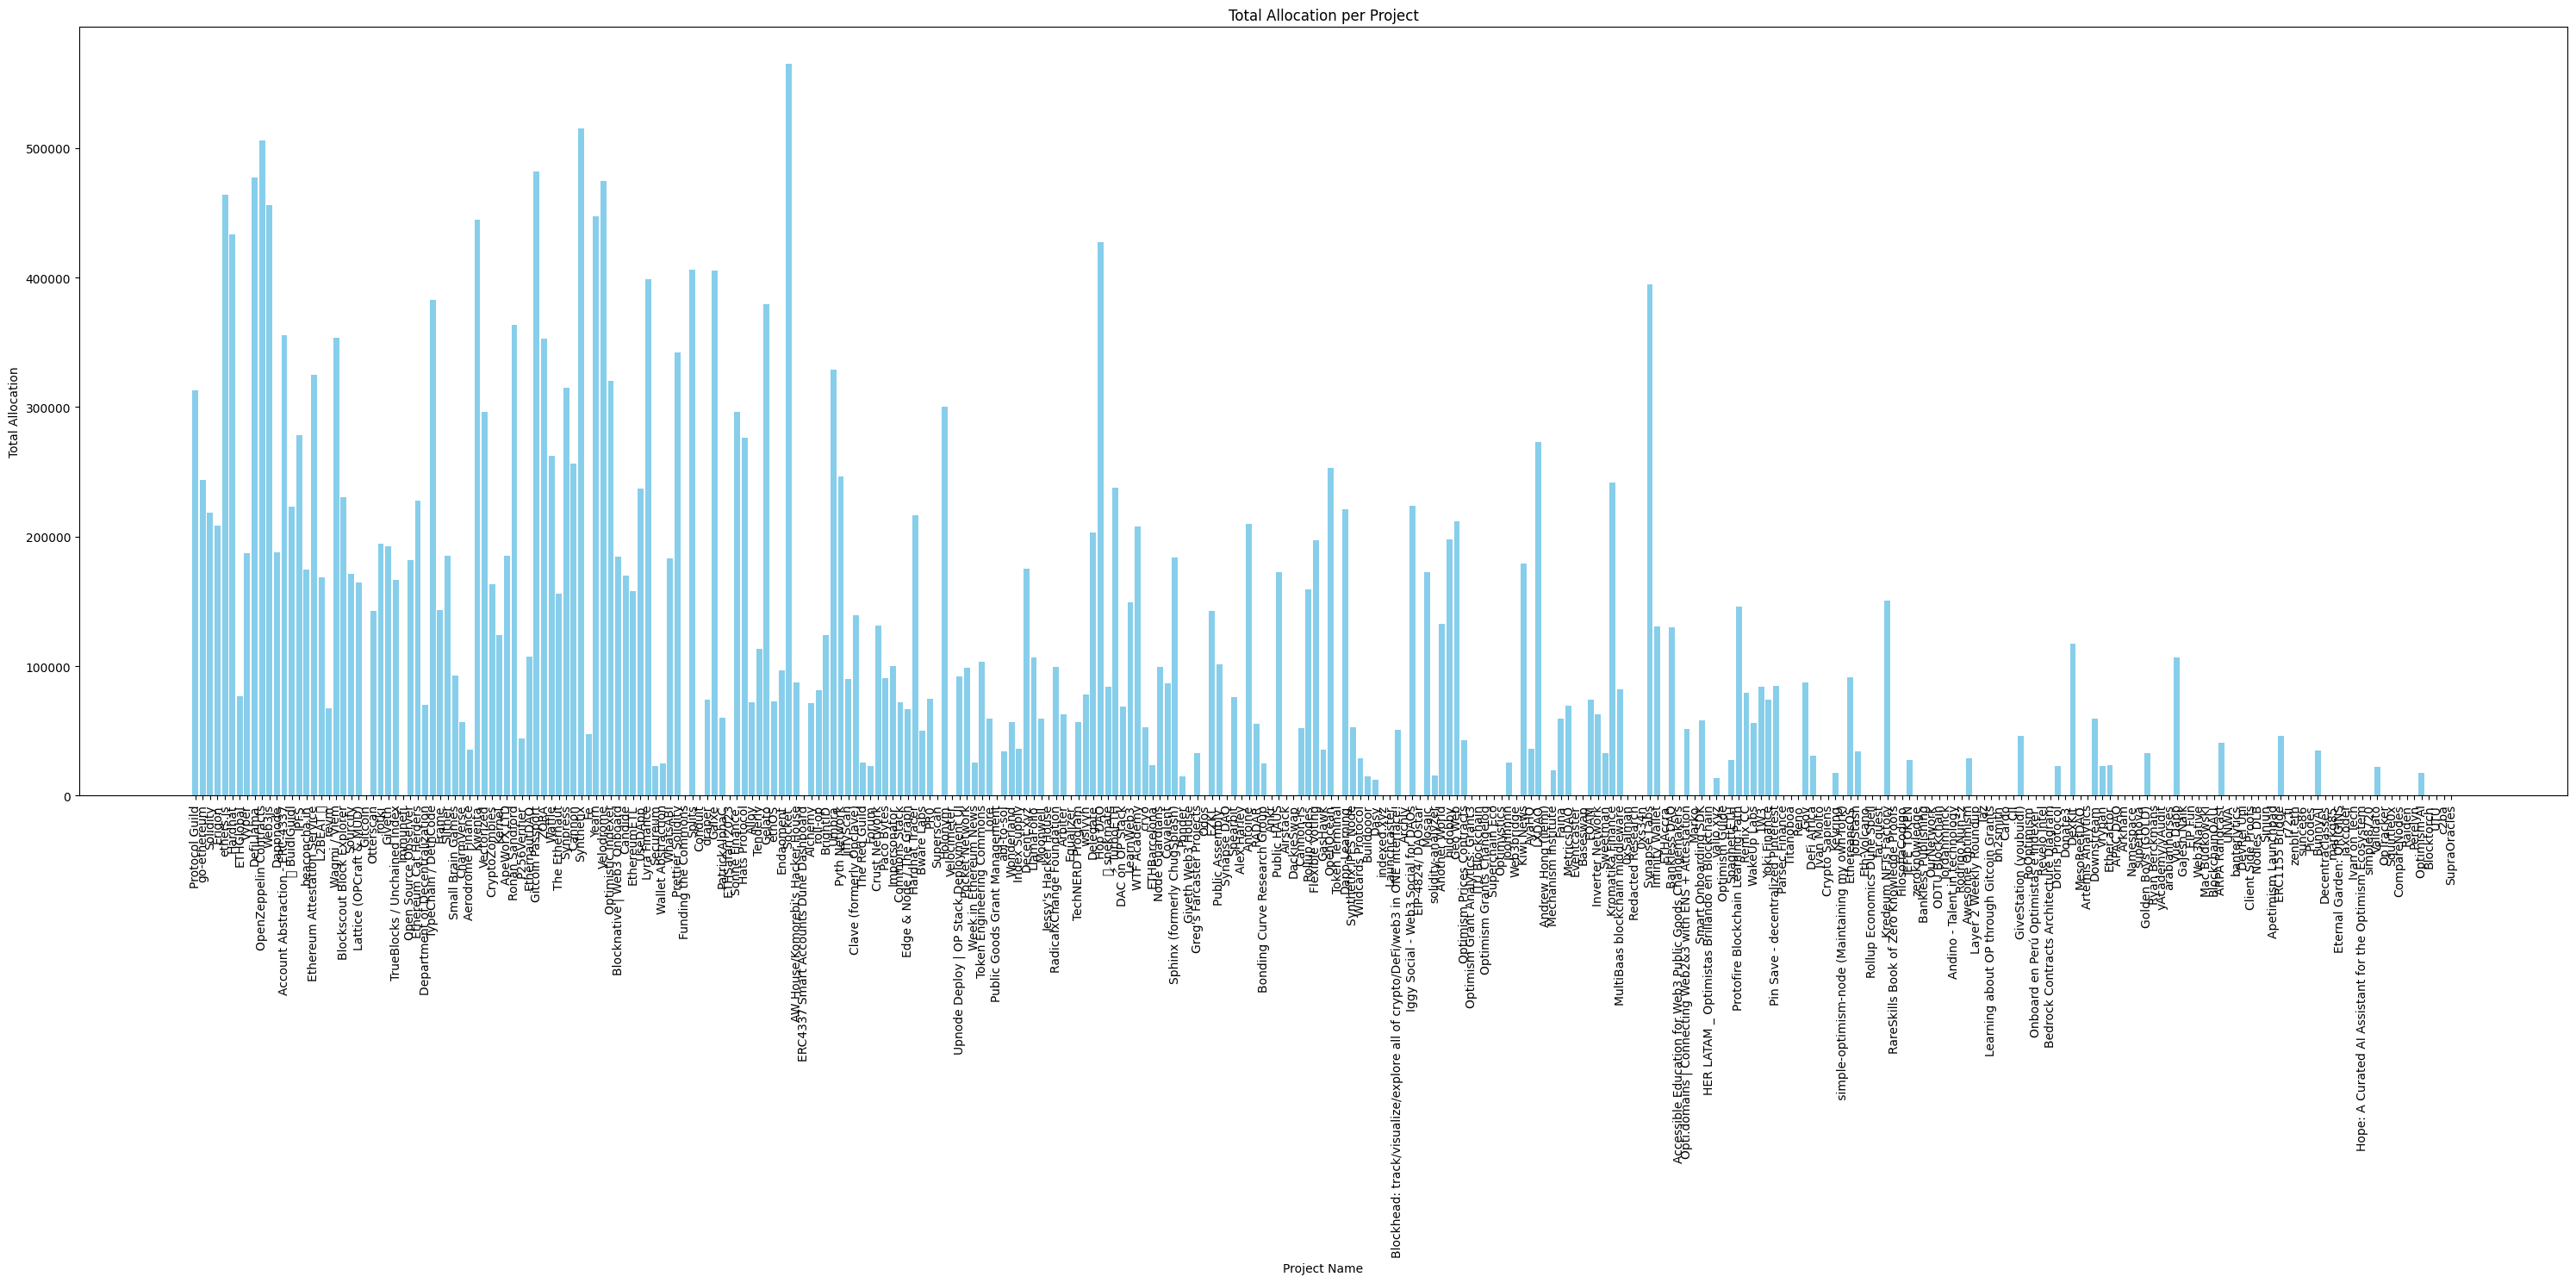

In [6]:
plt.figure(figsize=(30, 15))
plt.bar(selected_rows['Meta: Project Name'], selected_rows['Total Allocation'], color='skyblue')
plt.xlabel('Project Name')
plt.ylabel('Total Allocation')
plt.title('Total Allocation per Project')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\2561821270.py:9: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\2561821270.py:9: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  plt.tight_layout()
C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\2561821270.py:9: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127984 (\N{EUROPEAN CASTLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\

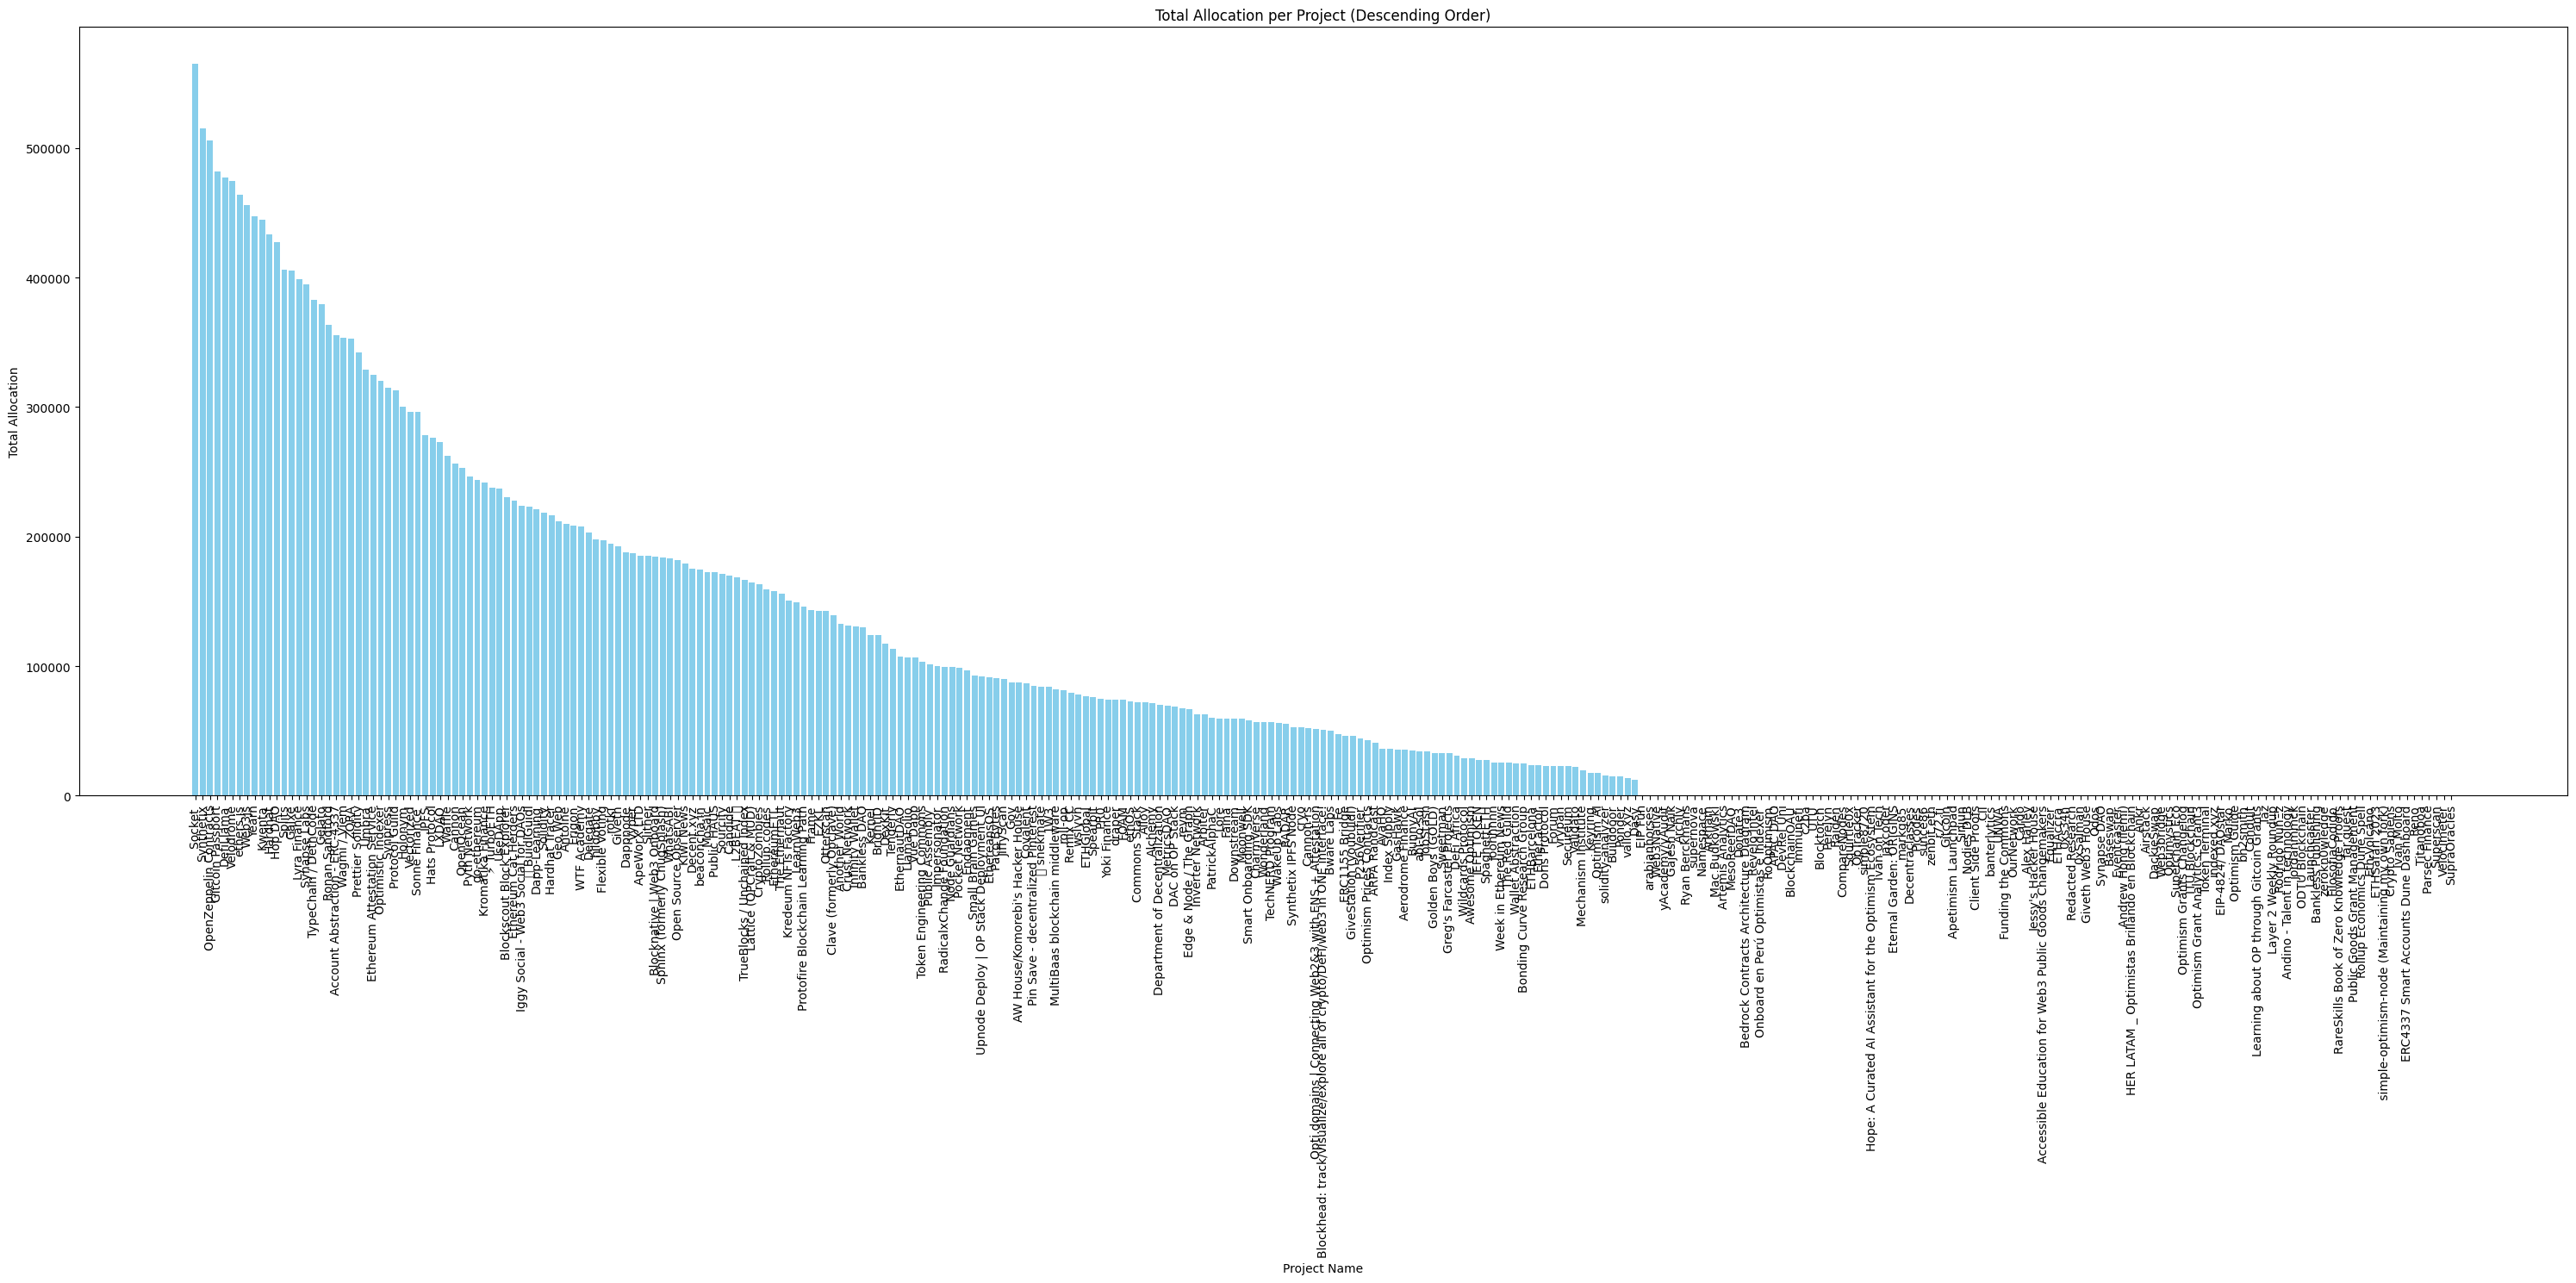

In [7]:
sorted_rows = selected_rows.sort_values(by='Total Allocation', ascending=False)

plt.figure(figsize=(30, 15))
plt.bar(sorted_rows['Meta: Project Name'], sorted_rows['Total Allocation'], color='skyblue')
plt.xlabel('Project Name')
plt.ylabel('Total Allocation')
plt.title('Total Allocation per Project (Descending Order)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\1416793077.py:10: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  plt.tight_layout()
c:\Users\sikar\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128013 (\N{SNAKE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


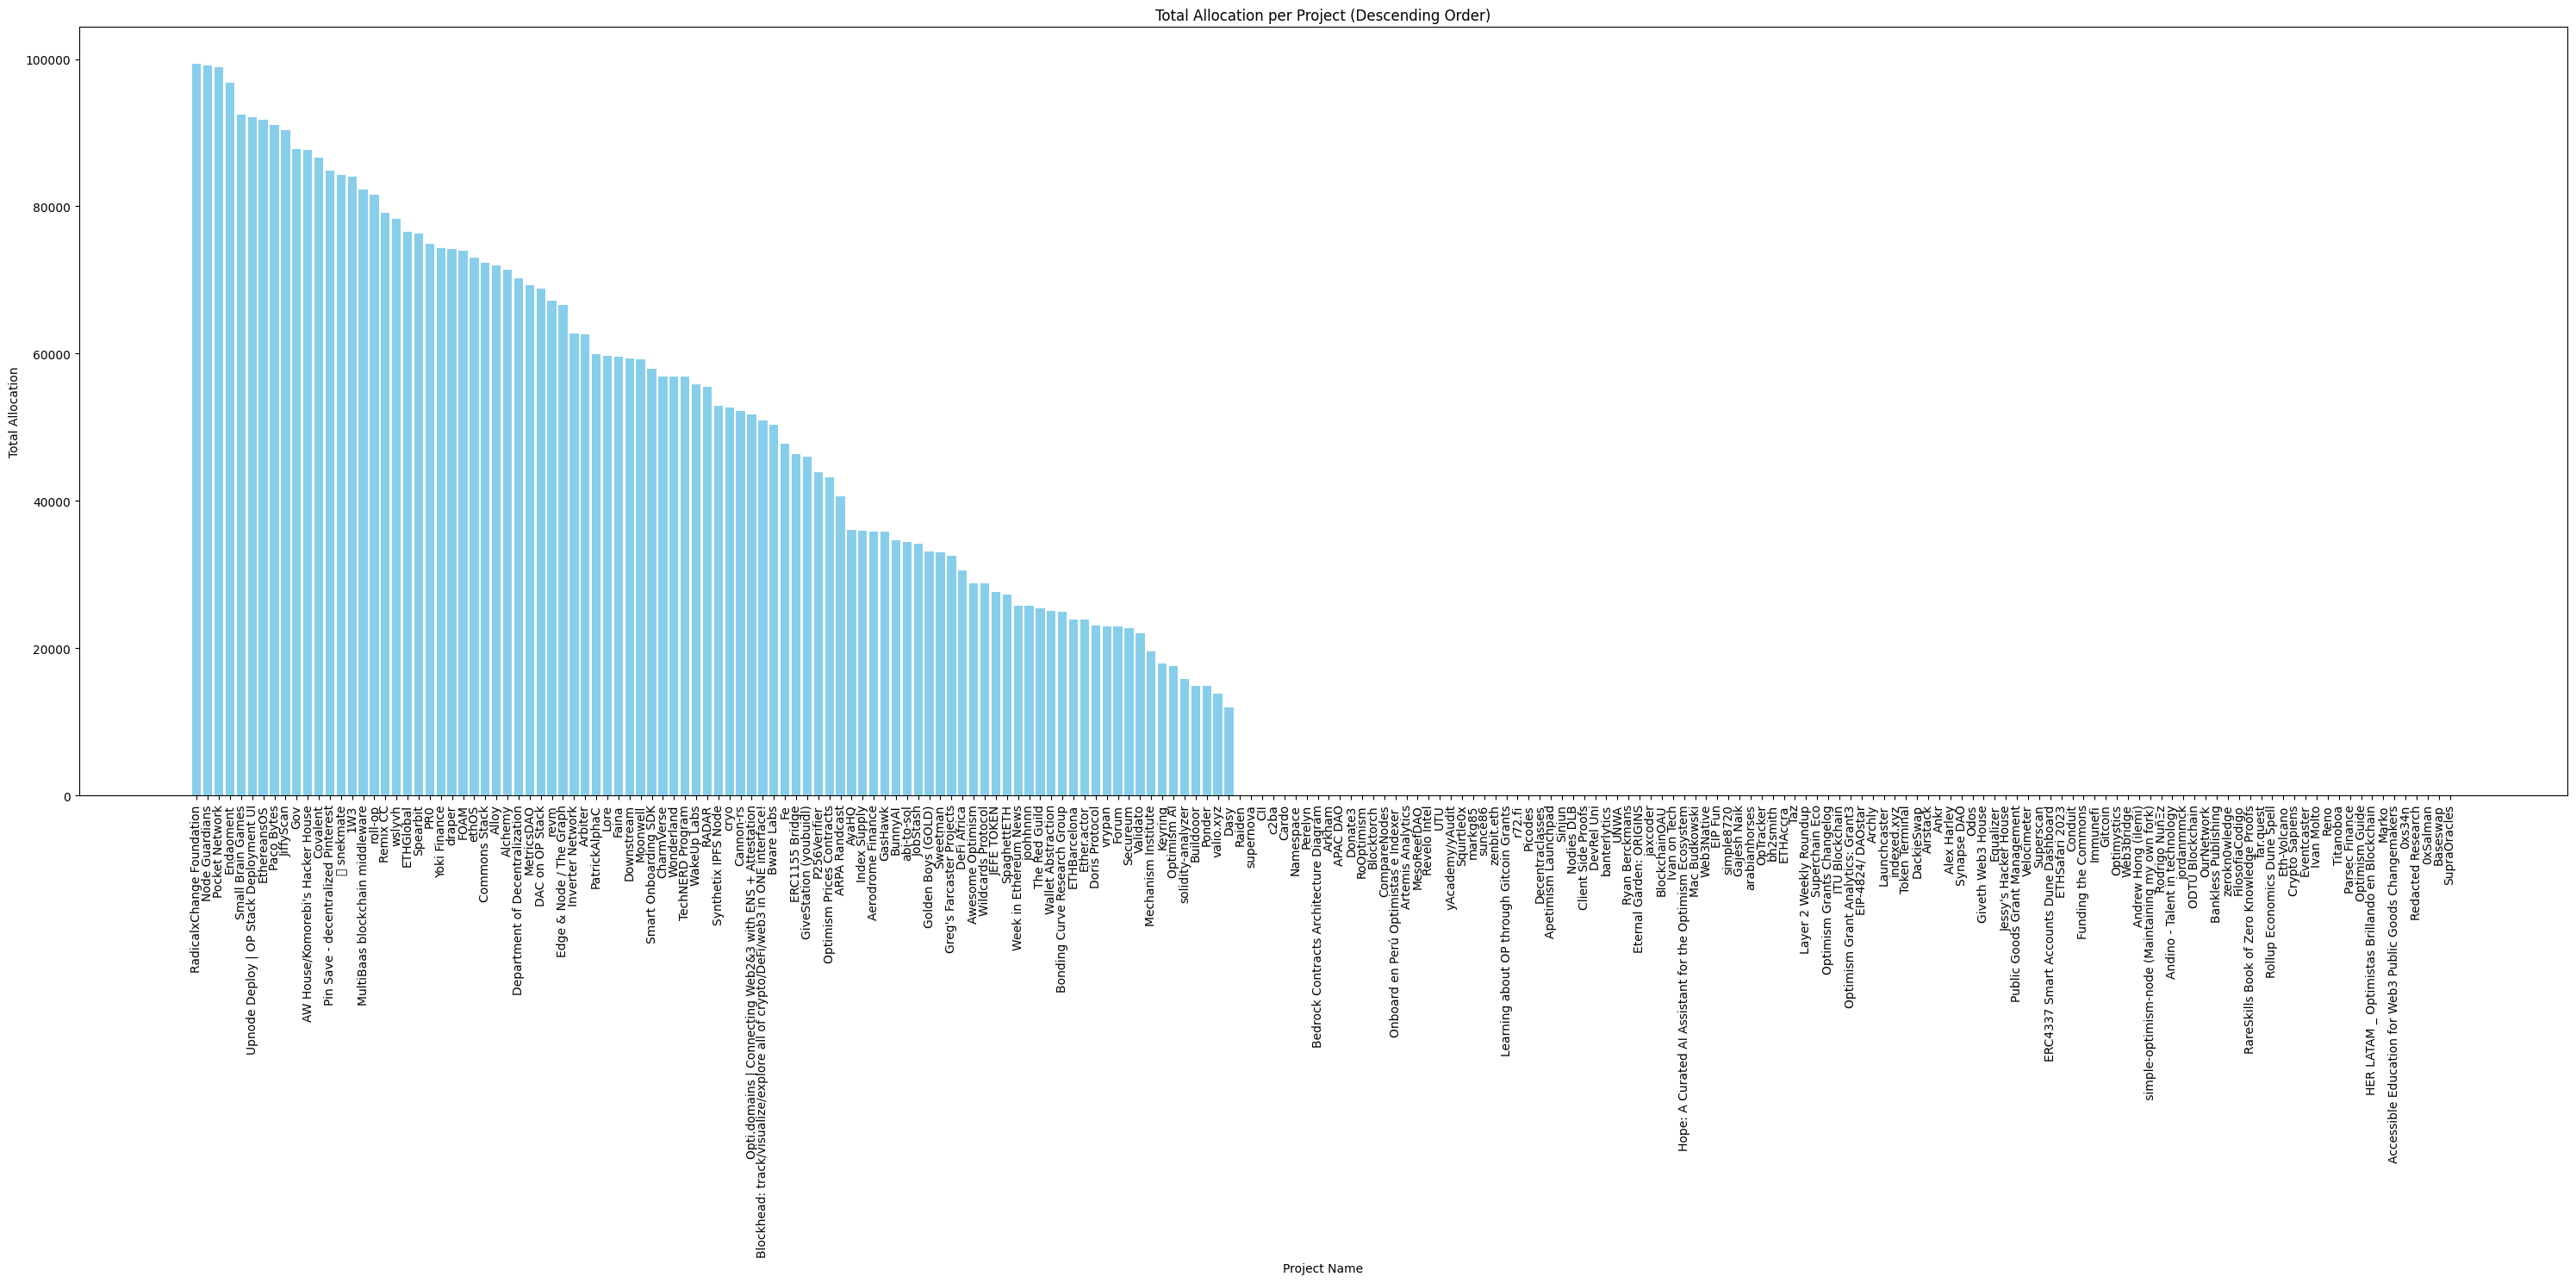

In [8]:
filtered_rows = selected_rows[selected_rows['Total Allocation'] < 100000]
sorted_rows = filtered_rows.sort_values(by='Total Allocation', ascending=False)

plt.figure(figsize=(30, 15))
plt.bar(sorted_rows['Meta: Project Name'], sorted_rows['Total Allocation'], color='skyblue')
plt.xlabel('Project Name')
plt.ylabel('Total Allocation')
plt.title('Total Allocation per Project (Descending Order)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [9]:
describeed = selected_rows.describe()
describeed

,Category: Developer Ecosystem,OSO: Total Contributors,OSO: Total Forks,OSO: Total Stars,OSO: Contributors Last 6 Months,OSO: Avg Monthly Active Devs Last 6 Months,OSO: # GitHub Repos,OSO: # OP Contracts,OSO: Total Onchain Users,OSO: Onchain Users Last 6 Months,OSO: Total Txns,OSO: Total Txn Fees (ETH),OSO: Txn Fees Last 6 Months (ETH),OSO: # NPM Packages,OSO: Total Downloads,OSO: Downloads Last 6 Months,Allocation,Total Allocation
count,305.0,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,1.0,2.362962,1.482655,1.917305,1.601737,0.490617,1.334262,0.318118,0.951453,0.870264,1.222016,0.082805,0.080908,0.075483,1.004410,0.942003,14.736998,98360.655475
std,0.0,2.371543,2.457163,2.932826,1.634413,0.689341,1.429046,0.989099,2.790004,2.528553,3.396344,0.412457,0.406686,0.289110,3.601099,3.361398,18.970898,126619.405294
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.945910,0.000000,0.000000,1.386294,0.154151,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.632401,50941.720000
75%,1.0,3.988984,2.484907,3.637586,2.639057,0.773190,2.397895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.433595,163079.640000
max,1.0,9.684896,9.834673,10.687617,7.213032,3.846595,6.304449,6.898715,13.420720,12.332423,16.183639,3.453911,3.399075,2.397895,18.562618,17.143445,84.668540,565111.900000


In [10]:
median = selected_rows.median()
median

C:\Users\sikar\AppData\Local\Temp\ipykernel_36376\3429048069.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = selected_rows.median()


Category: Developer Ecosystem                     1.000000
OSO: Total Contributors                           1.945910
OSO: Total Forks                                  0.000000
OSO: Total Stars                                  0.000000
OSO: Contributors Last 6 Months                   1.386294
OSO: Avg Monthly Active Devs Last 6 Months        0.154151
OSO: # GitHub Repos                               0.693147
OSO: # OP Contracts                               0.000000
OSO: Total Onchain Users                          0.000000
OSO: Onchain Users Last 6 Months                  0.000000
OSO: Total Txns                                   0.000000
OSO: Total Txn Fees (ETH)                         0.000000
OSO: Txn Fees Last 6 Months (ETH)                 0.000000
OSO: # NPM Packages                               0.000000
OSO: Total Downloads                              0.000000
OSO: Downloads Last 6 Months                      0.000000
Allocation                                        7.6324